# 7.5. Fitting a probability distribution to data with the maximum likelihood method

In [1]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = statsmodels.datasets.heart.load_pandas().data

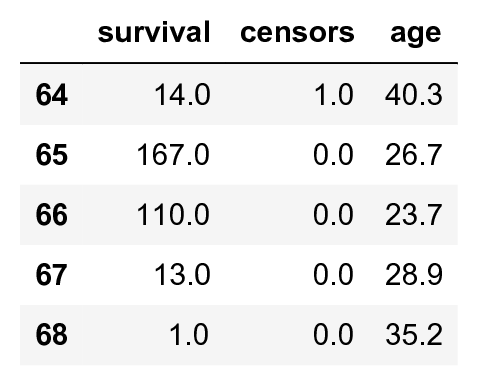

In [3]:
data.tail()

In [4]:
data = data[data.censors == 1]
survival = data.survival

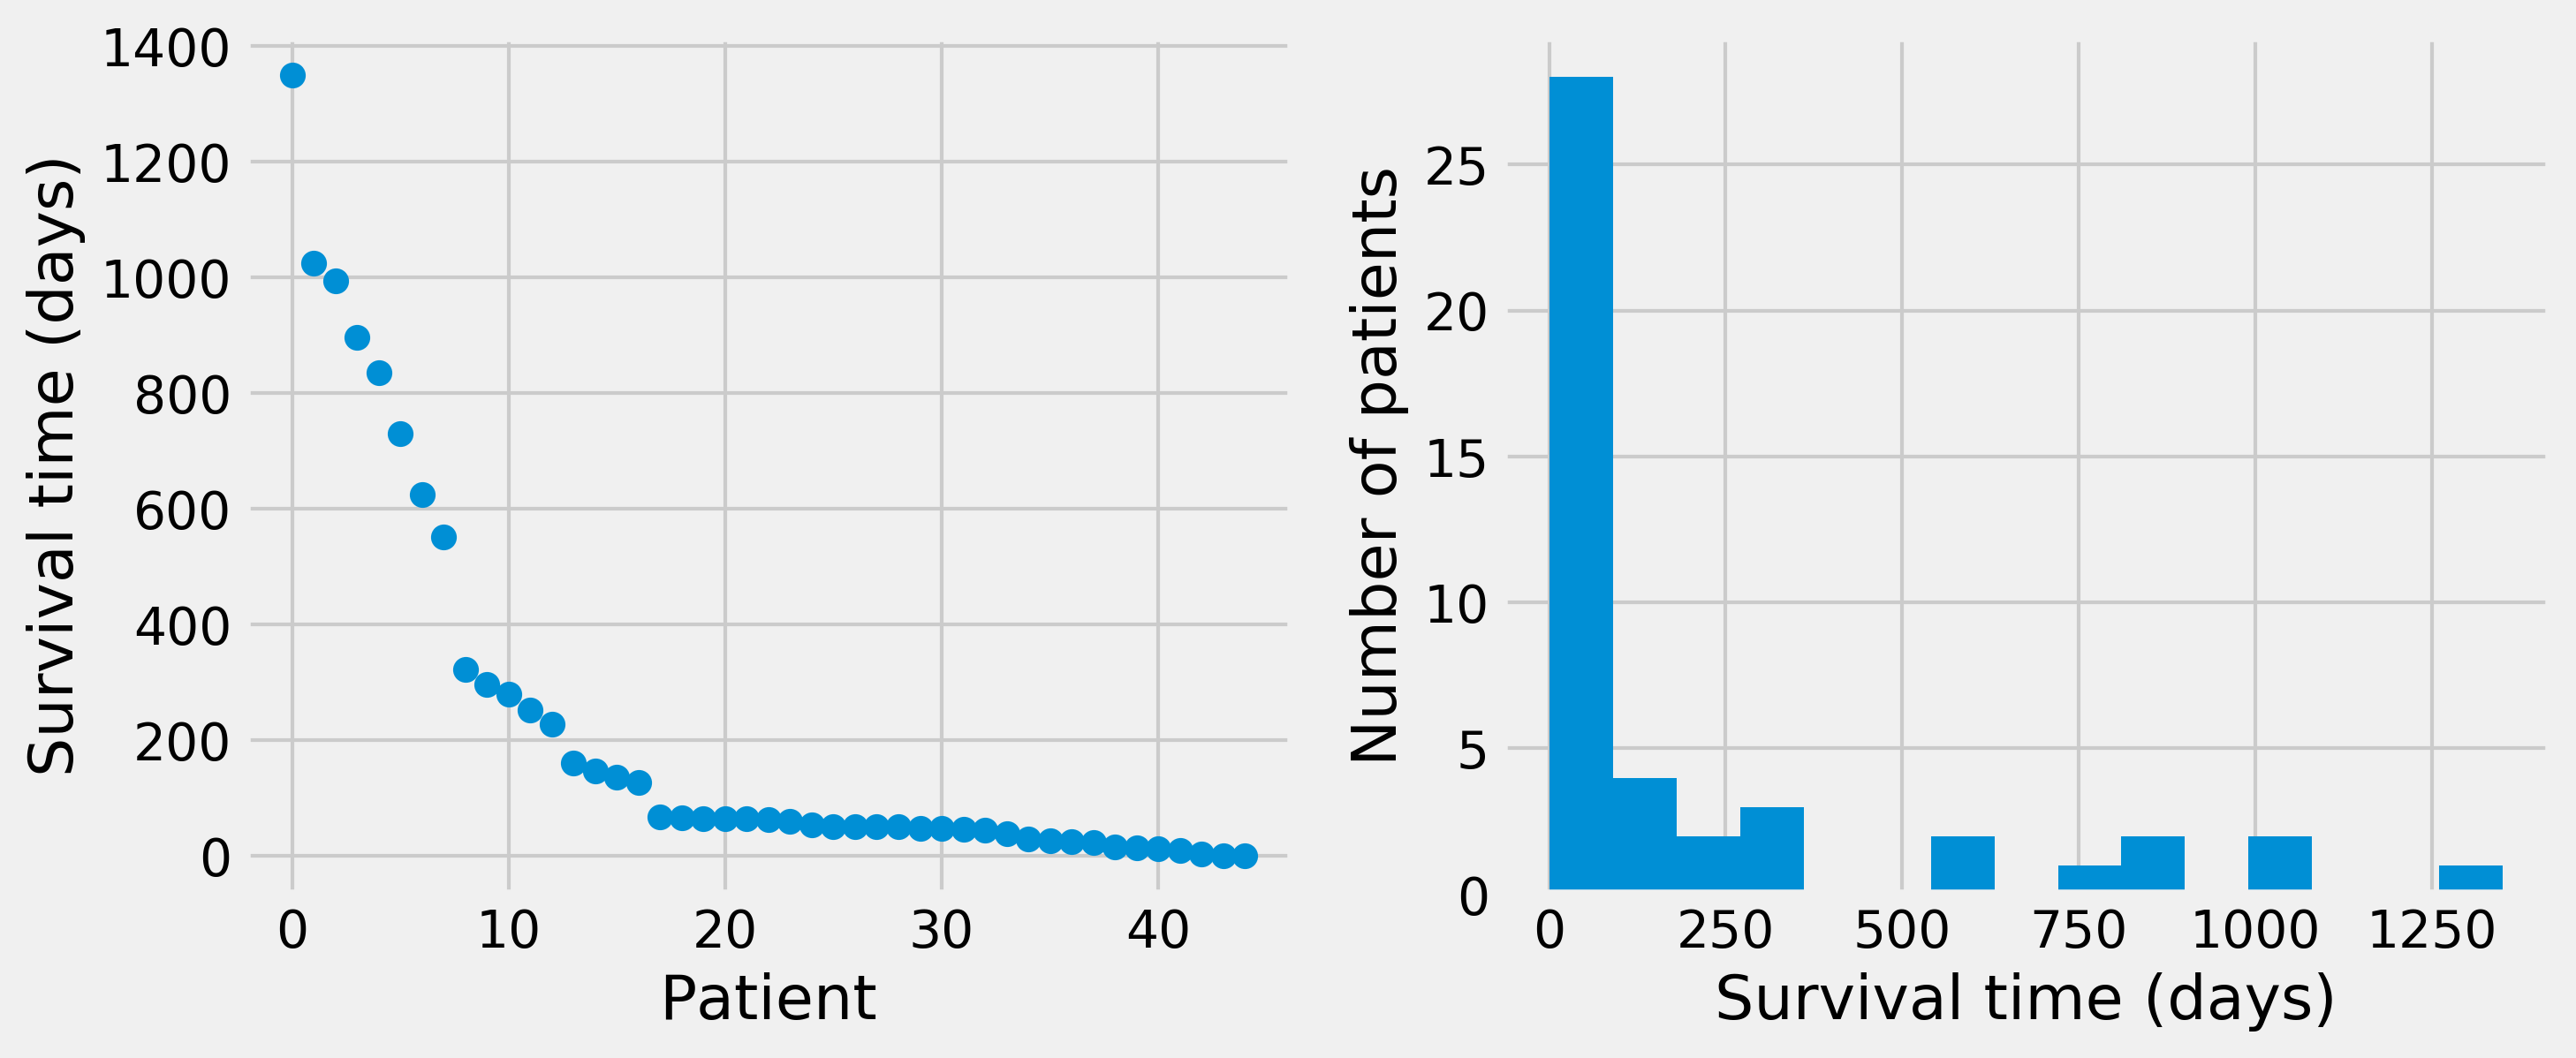

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

In [6]:
smean = survival.mean()
rate = 1. / smean

In [7]:
smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two
# consecutive values in `days`
dt = smax / 999.

In [8]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

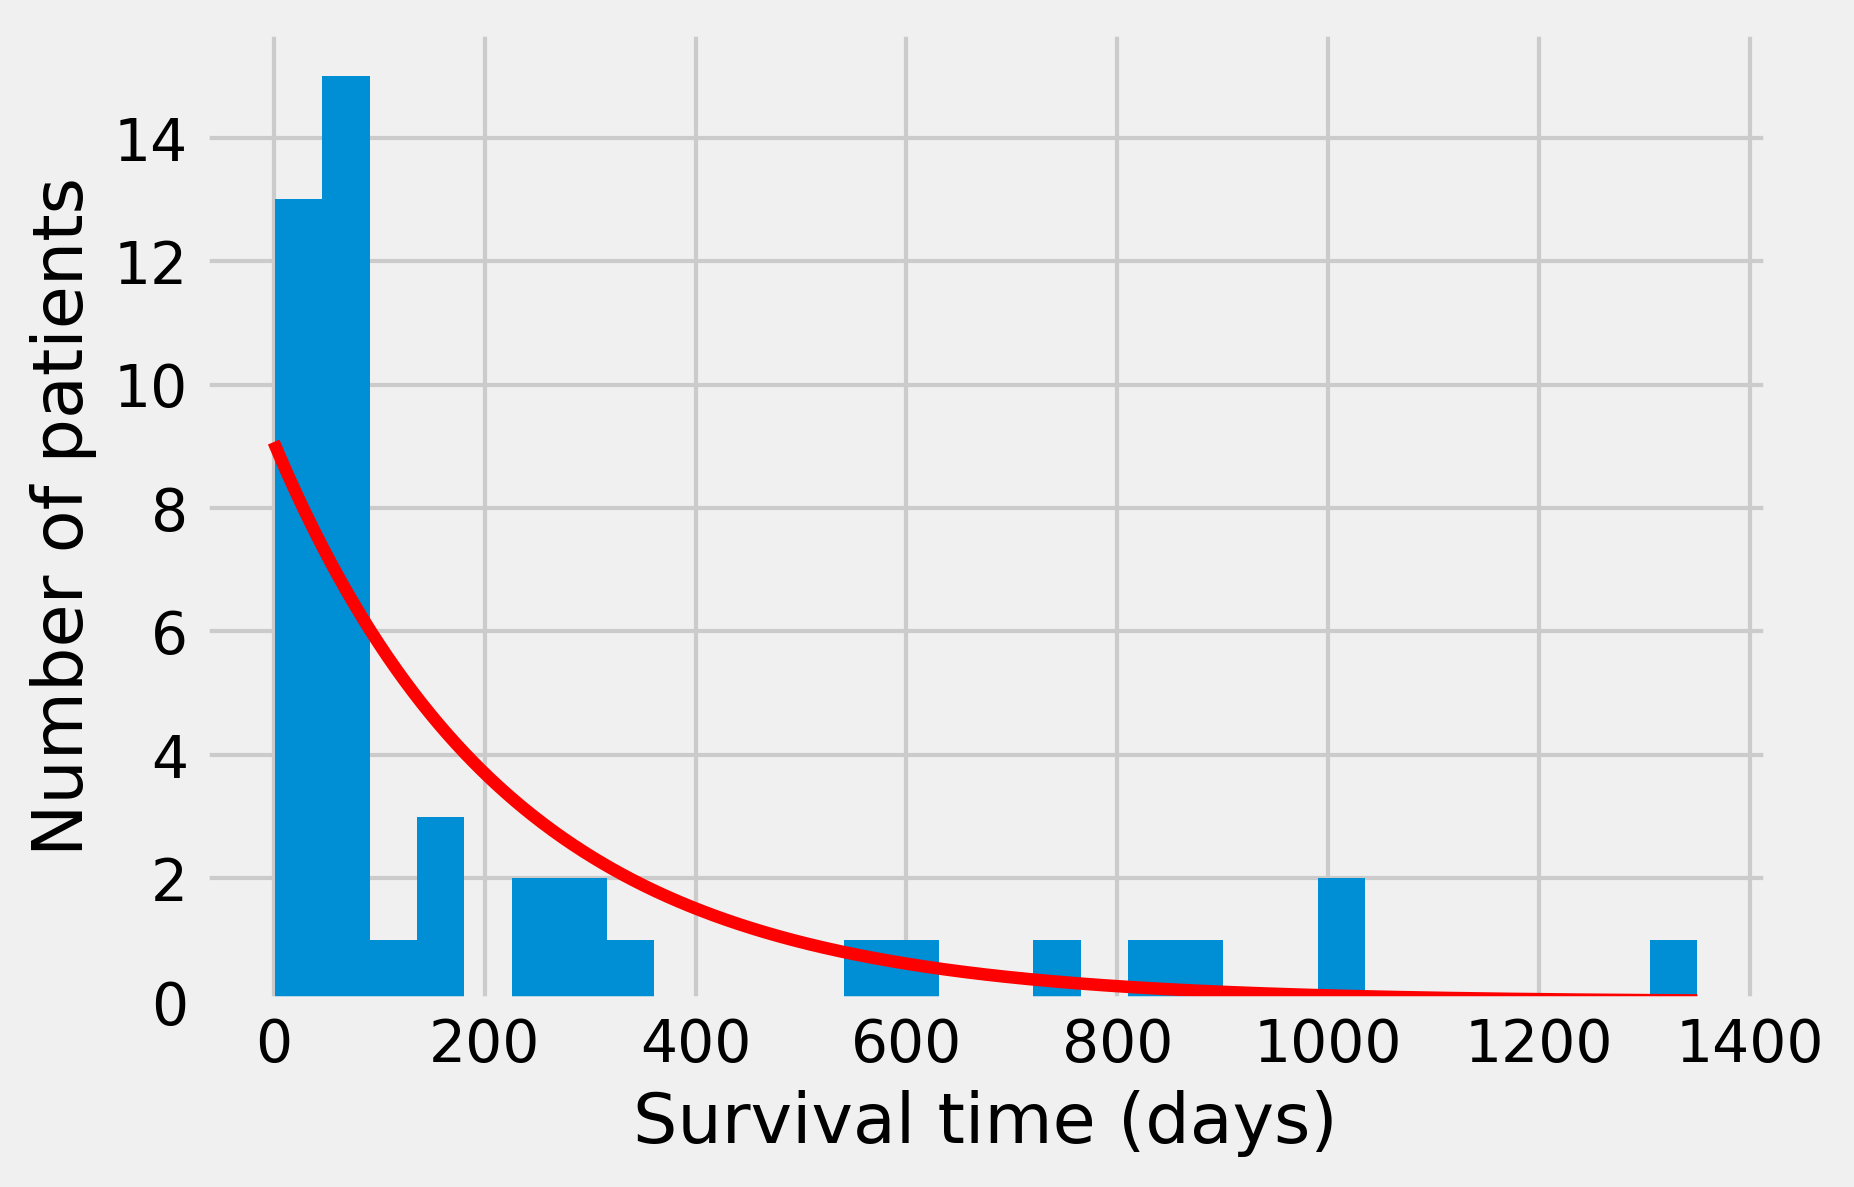

In [9]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

In [10]:
dist = st.expon
args = dist.fit(survival)
args

(1.000, 222.289)

In [11]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.362, pvalue=8.647e-06)

In [12]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.188, pvalue=0.073)

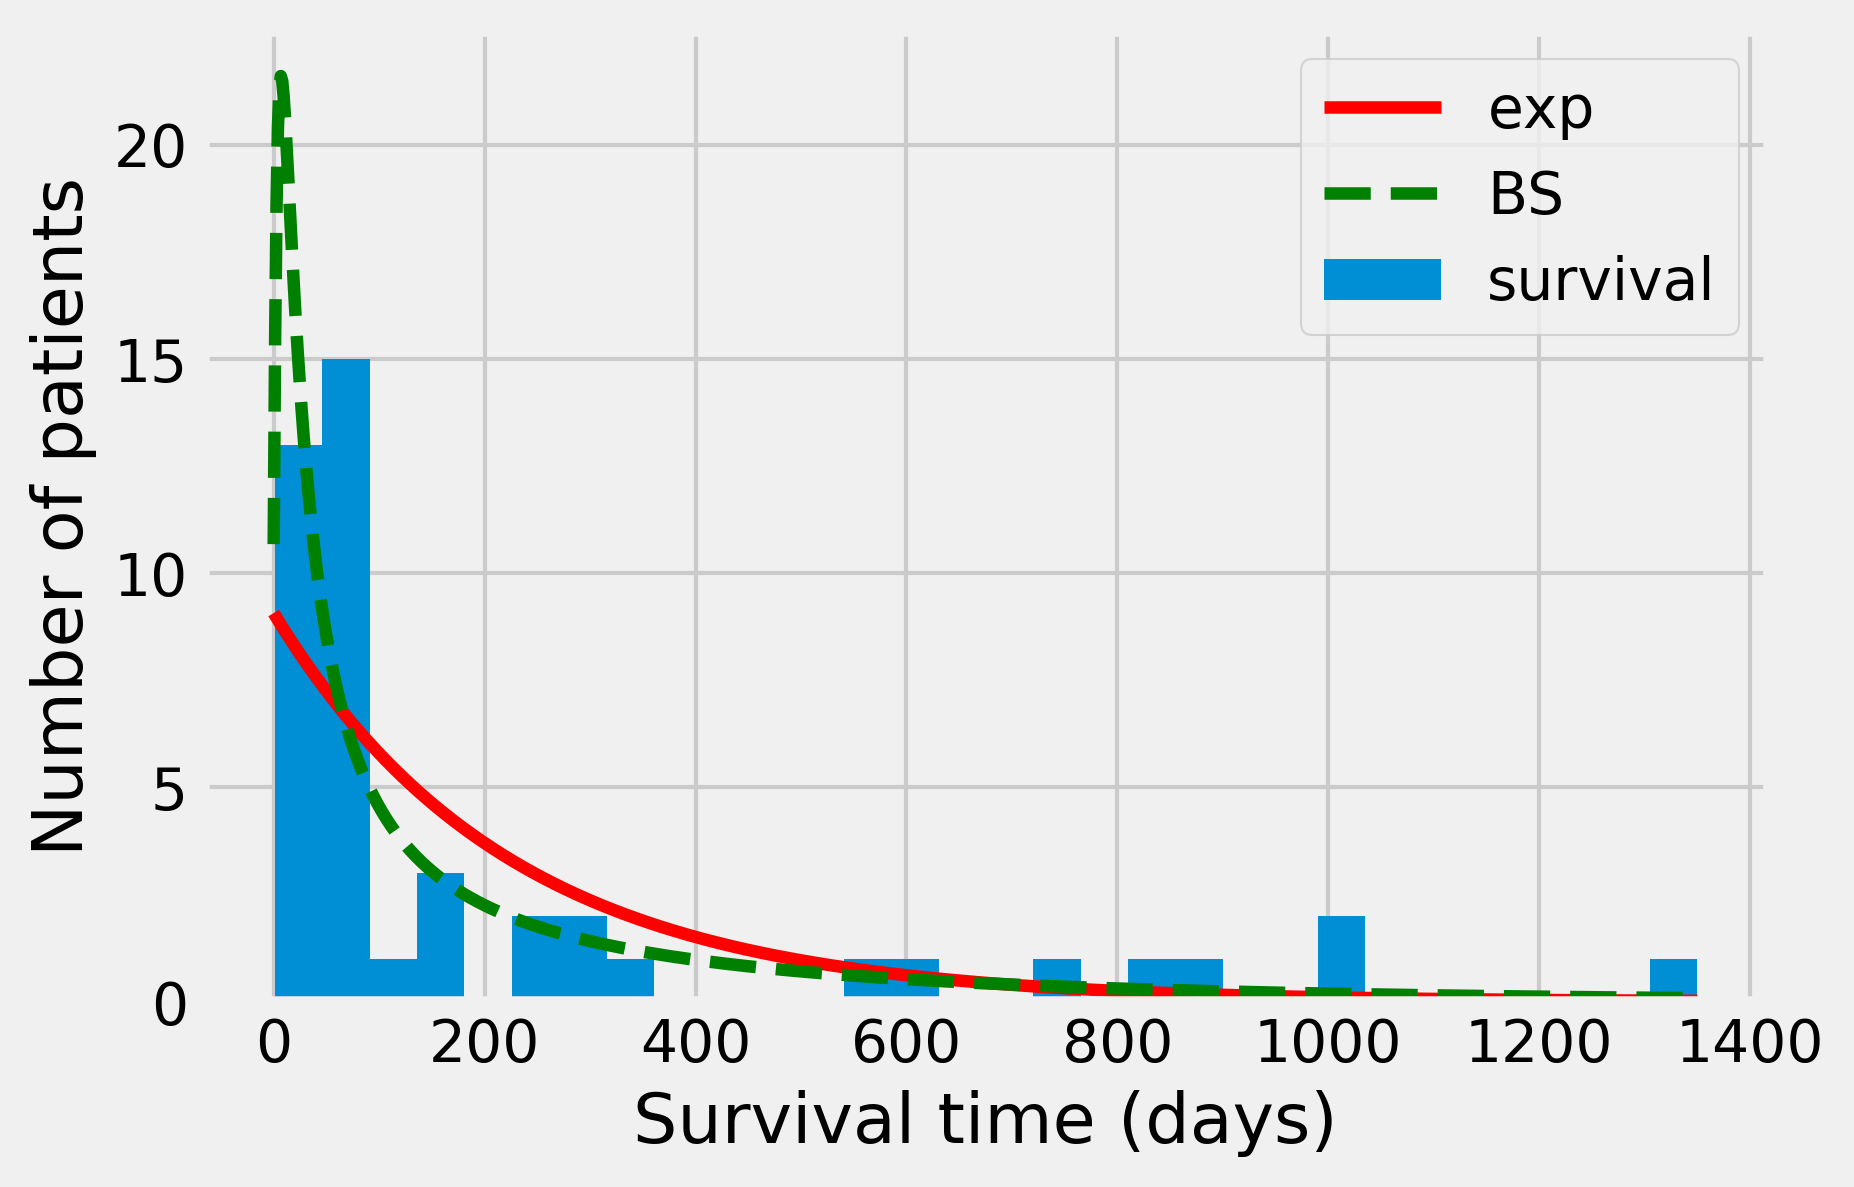

In [13]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()